<a href="https://colab.research.google.com/github/JaswanthRavipati/Eda_da/blob/main/Eda21BDS0158.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Jaswanth")
print("21BDS0158")

Jaswanth
21BDS0158


Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [3]:
data = pd.read_csv('employee_promotion.csv')

Aanlyzing Dataset

In [4]:
print(data.shape)

(54808, 13)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  object 
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54807 non-null  float64
 11  avg_training_score    52247 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 5.4+ MB
None


In [6]:
print(data.describe())

        employee_id  no_of_trainings  previous_year_rating  length_of_service  \
count  54808.000000     54808.000000          50684.000000       54808.000000   
mean   39195.830627         1.253011              3.329256           5.865512   
std    22586.581449         0.609264              1.259993           4.265094   
min        1.000000         1.000000              1.000000           1.000000   
25%    19669.750000         1.000000              3.000000           3.000000   
50%    39225.500000         1.000000              3.000000           5.000000   
75%    58730.500000         1.000000              4.000000           7.000000   
max    78298.000000        10.000000              5.000000          37.000000   

         awards_won  avg_training_score   is_promoted  
count  54807.000000        52247.000000  54808.000000  
mean       0.023172           63.712347      0.085170  
std        0.150452           13.522016      0.279137  
min        0.000000           39.000000      0

In [7]:
print(data.head())

   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings age  previous_year_rating  \
0            sourcing                1  35                   5.0   
1               other                1  30                   5.0   
2            sourcing                1  34                   3.0   
3               other                2  39                   1.0   
4               other                1  45                   3.0   

   length_of_service  awards_won  avg_training_score  is_promoted  
0                  8         0.0                49.0            0  
1               

Data Cleaning and Handling

In [8]:
print(data.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 1
avg_training_score      2561
is_promoted                0
dtype: int64


In [9]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category')
data['education'] = data['education'].fillna(data['education'].mode()[0])
print(data.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64


Univariate Analysis

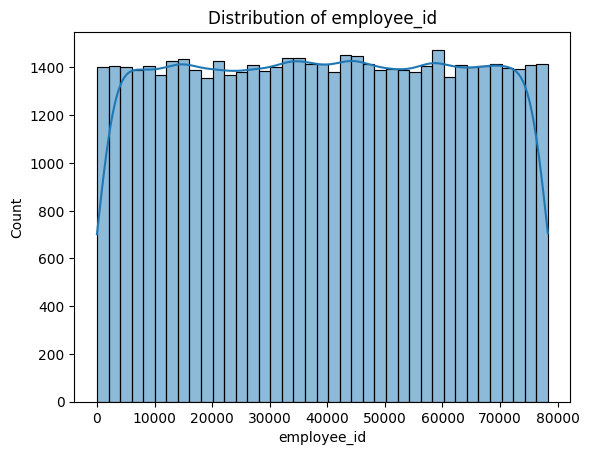

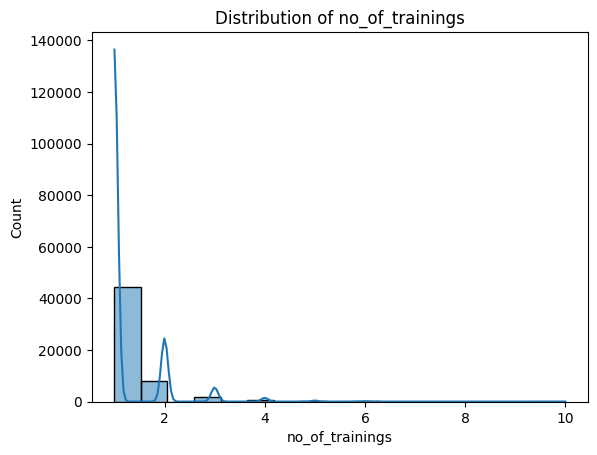

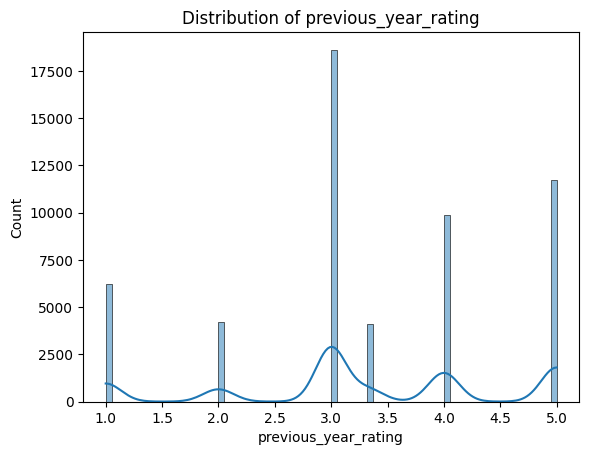

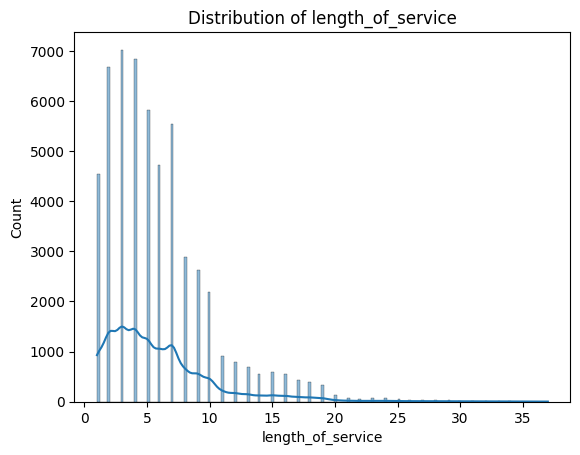

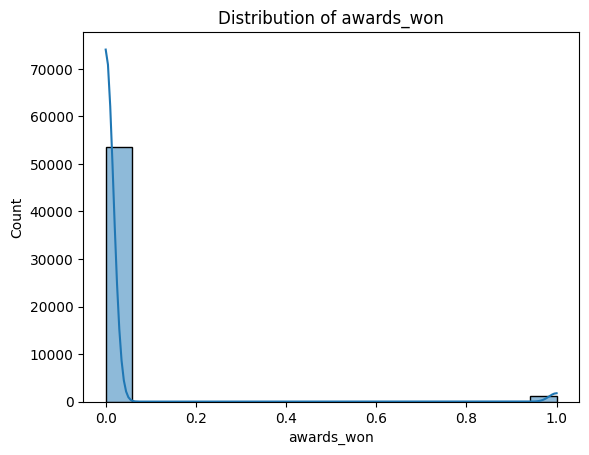

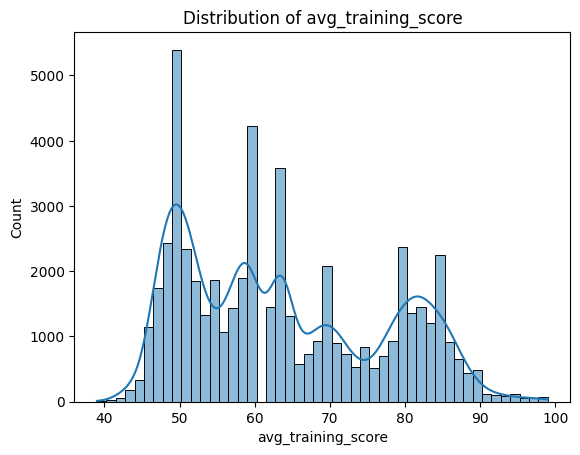

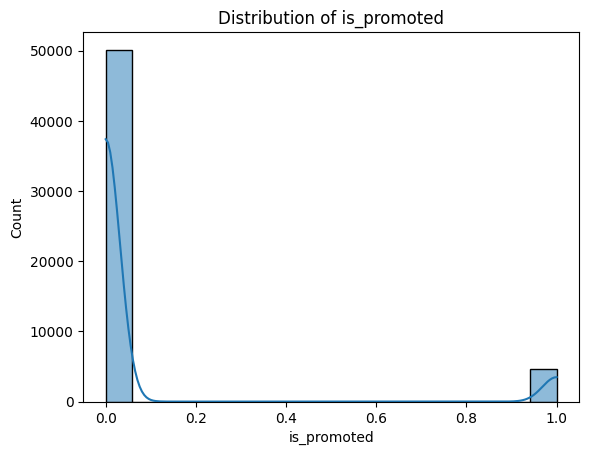

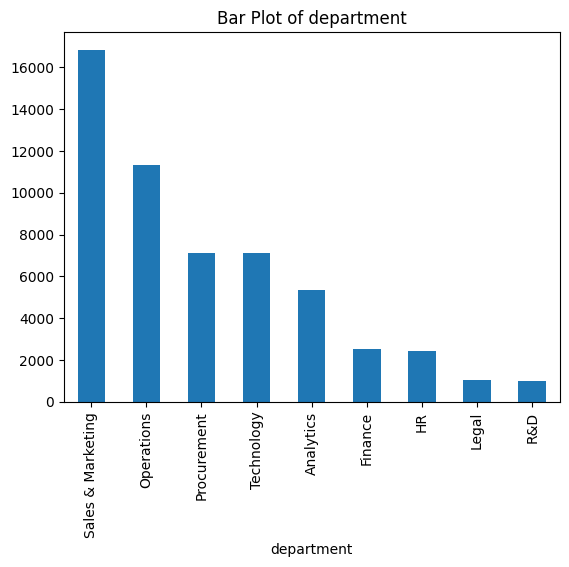

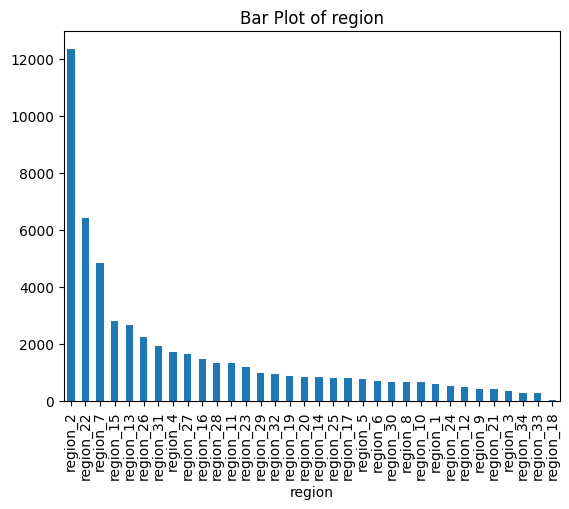

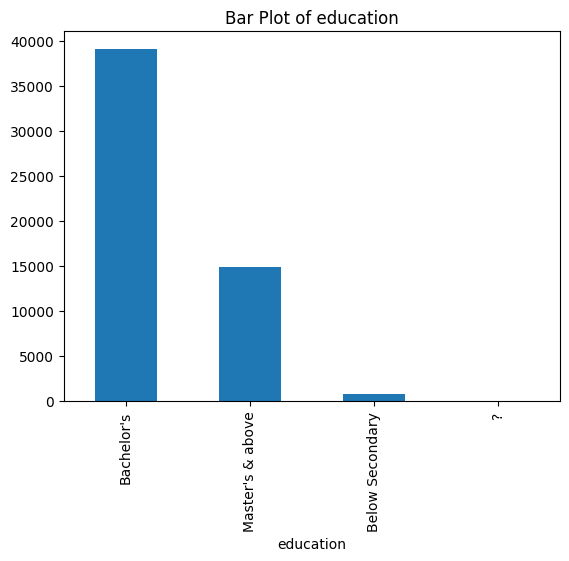

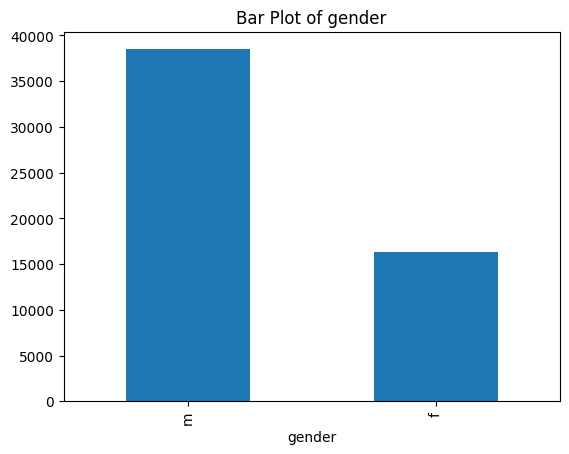

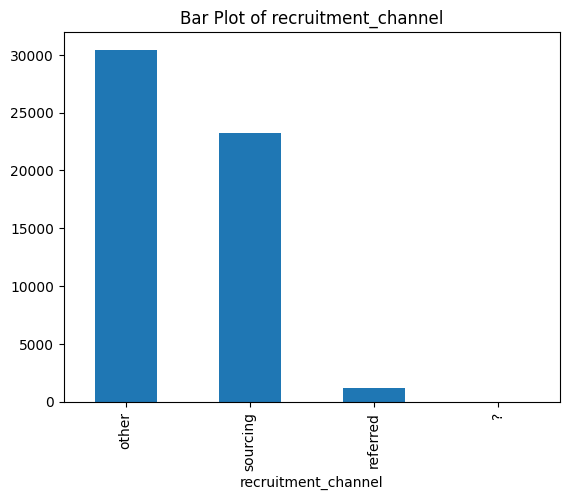

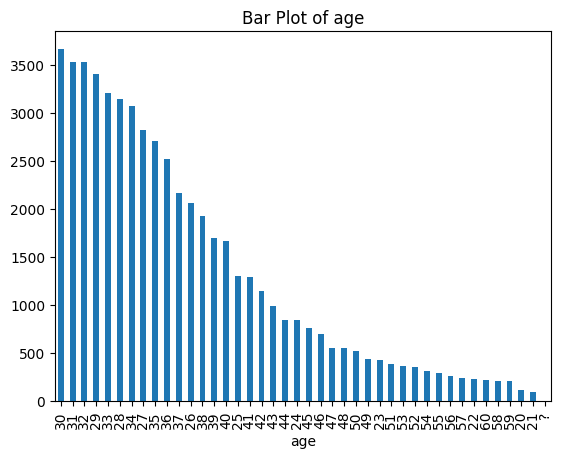

In [10]:
for col in data.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
for col in data.select_dtypes(include='category').columns:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Plot of {col}")
    plt.show()

Bivariate Analaysis

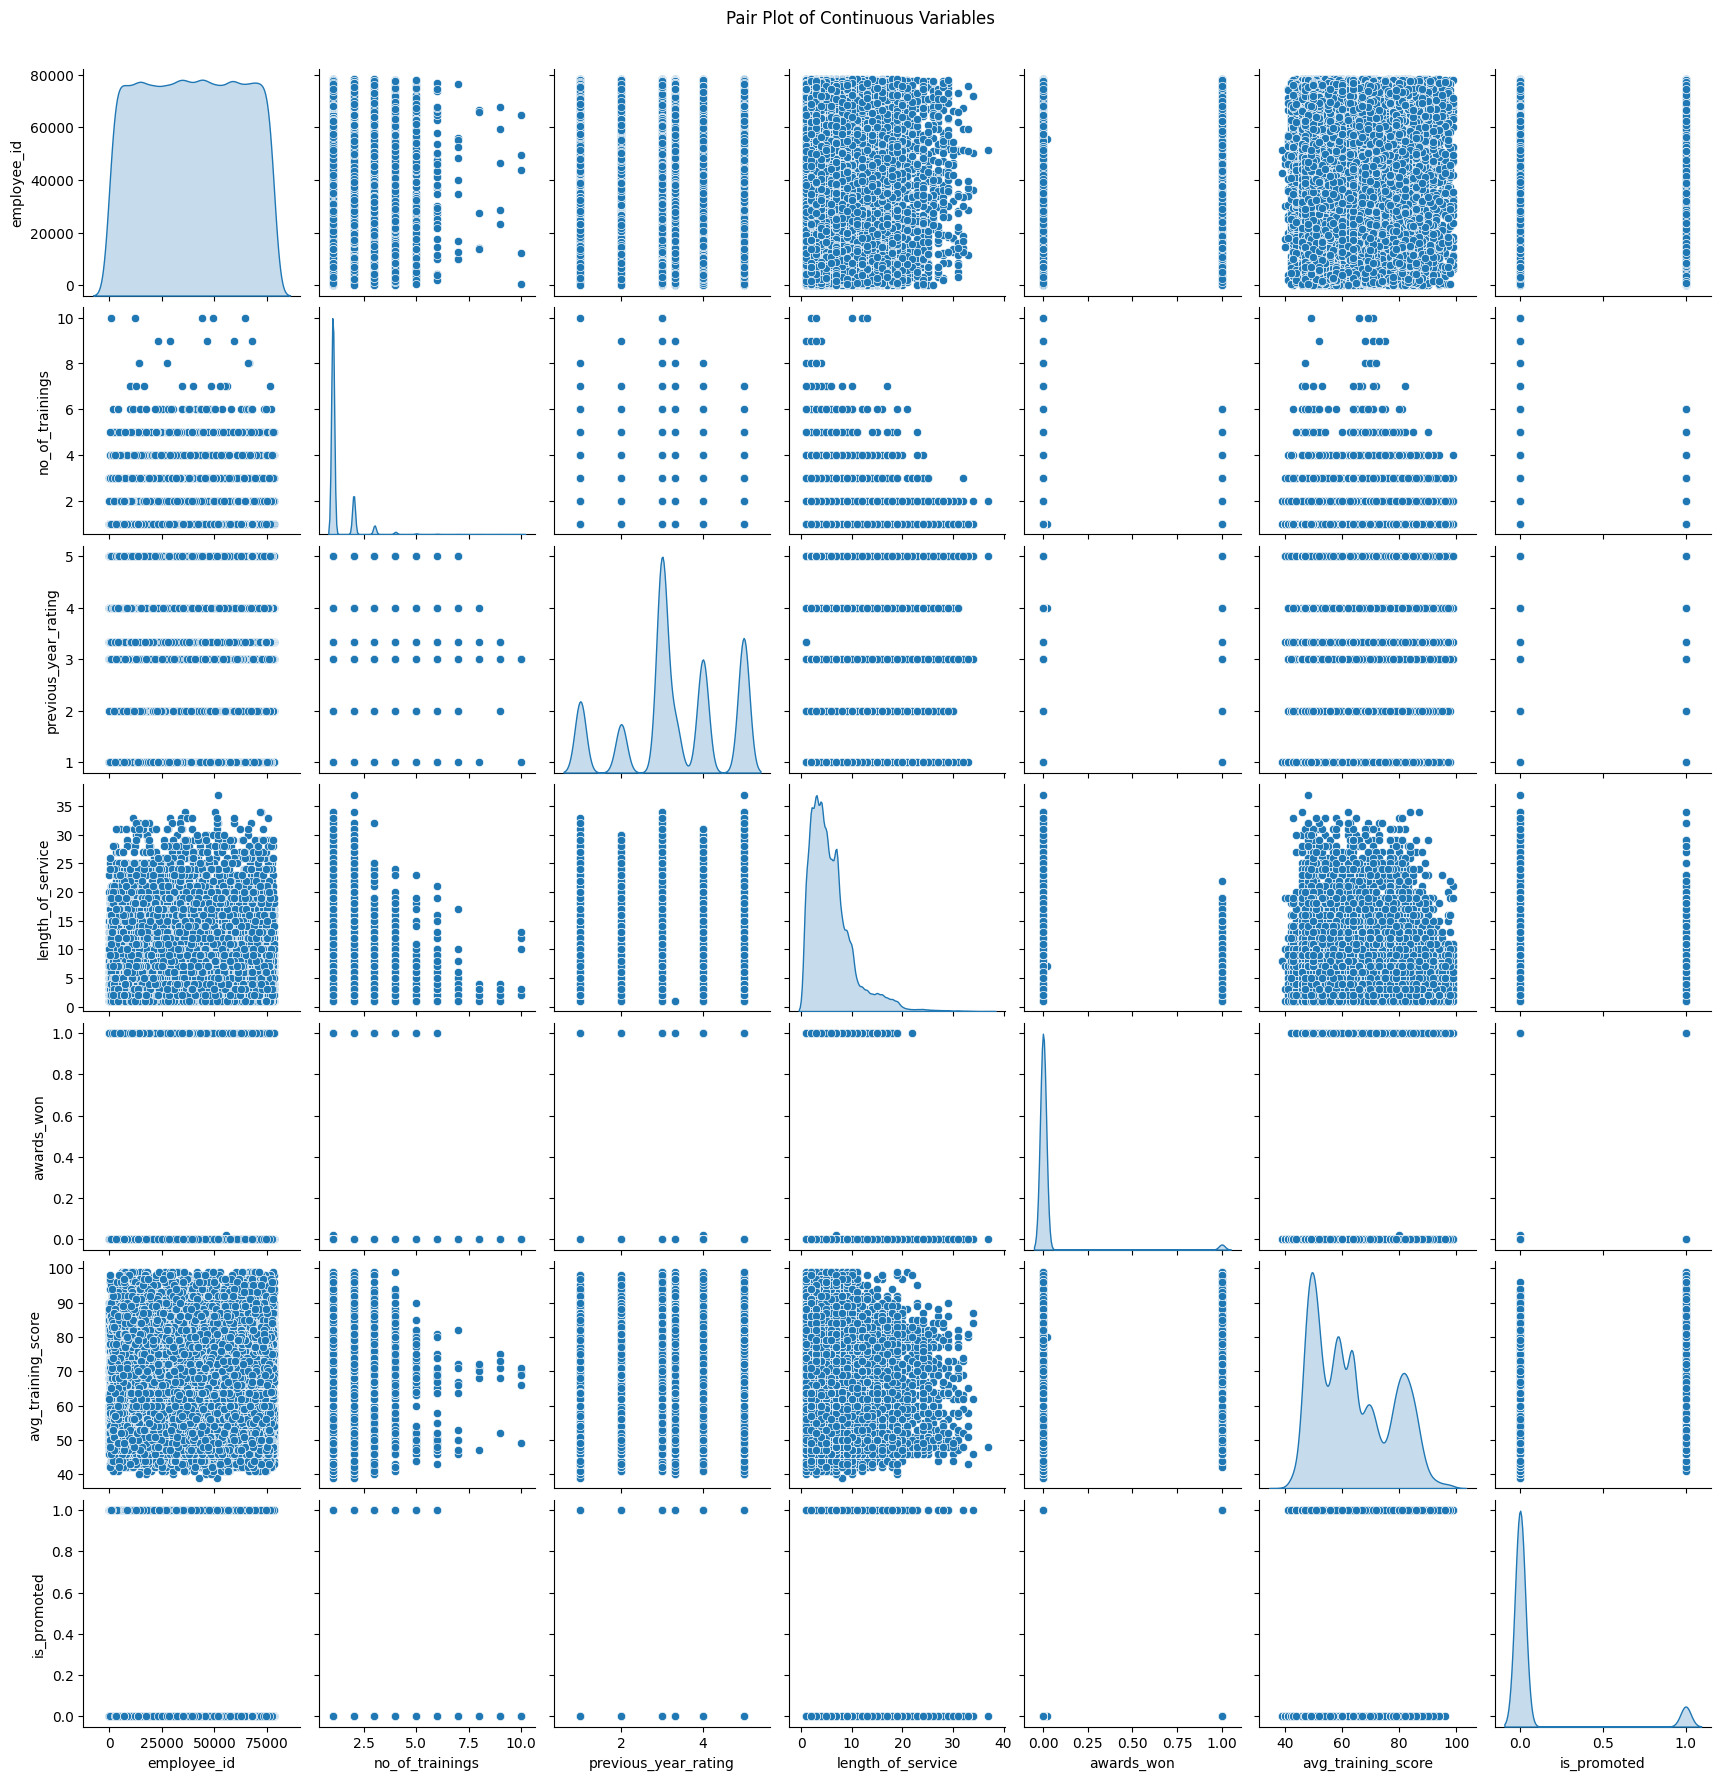

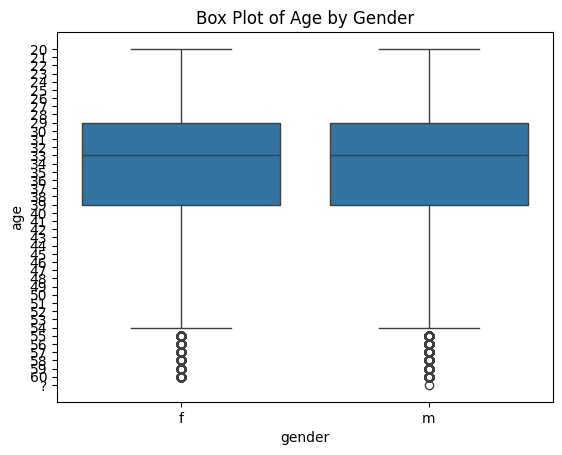

Contingency Table:
is_promoted      0     1
gender                  
f            14845  1467
m            35295  3201


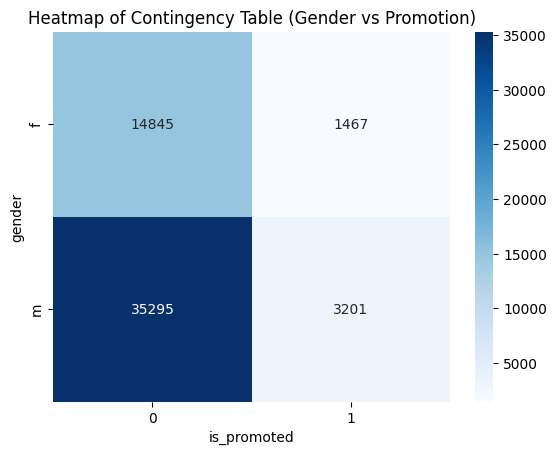

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Continuous vs Continuous (Scatter Plot + Correlation)
sns.pairplot(data[['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','awards_won','avg_training_score','is_promoted']], diag_kind='kde')
plt.suptitle("Pair Plot of Continuous Variables", y=1.02)
plt.show()
sns.boxplot(x='gender', y='age', data=data)
plt.title("Box Plot of Age by Gender")
plt.show()
contingency_table = pd.crosstab(data['gender'], data['is_promoted'])
print("Contingency Table:")
print(contingency_table)
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt='d')
plt.title("Heatmap of Contingency Table (Gender vs Promotion)")
plt.show()

Multivariate Analysis

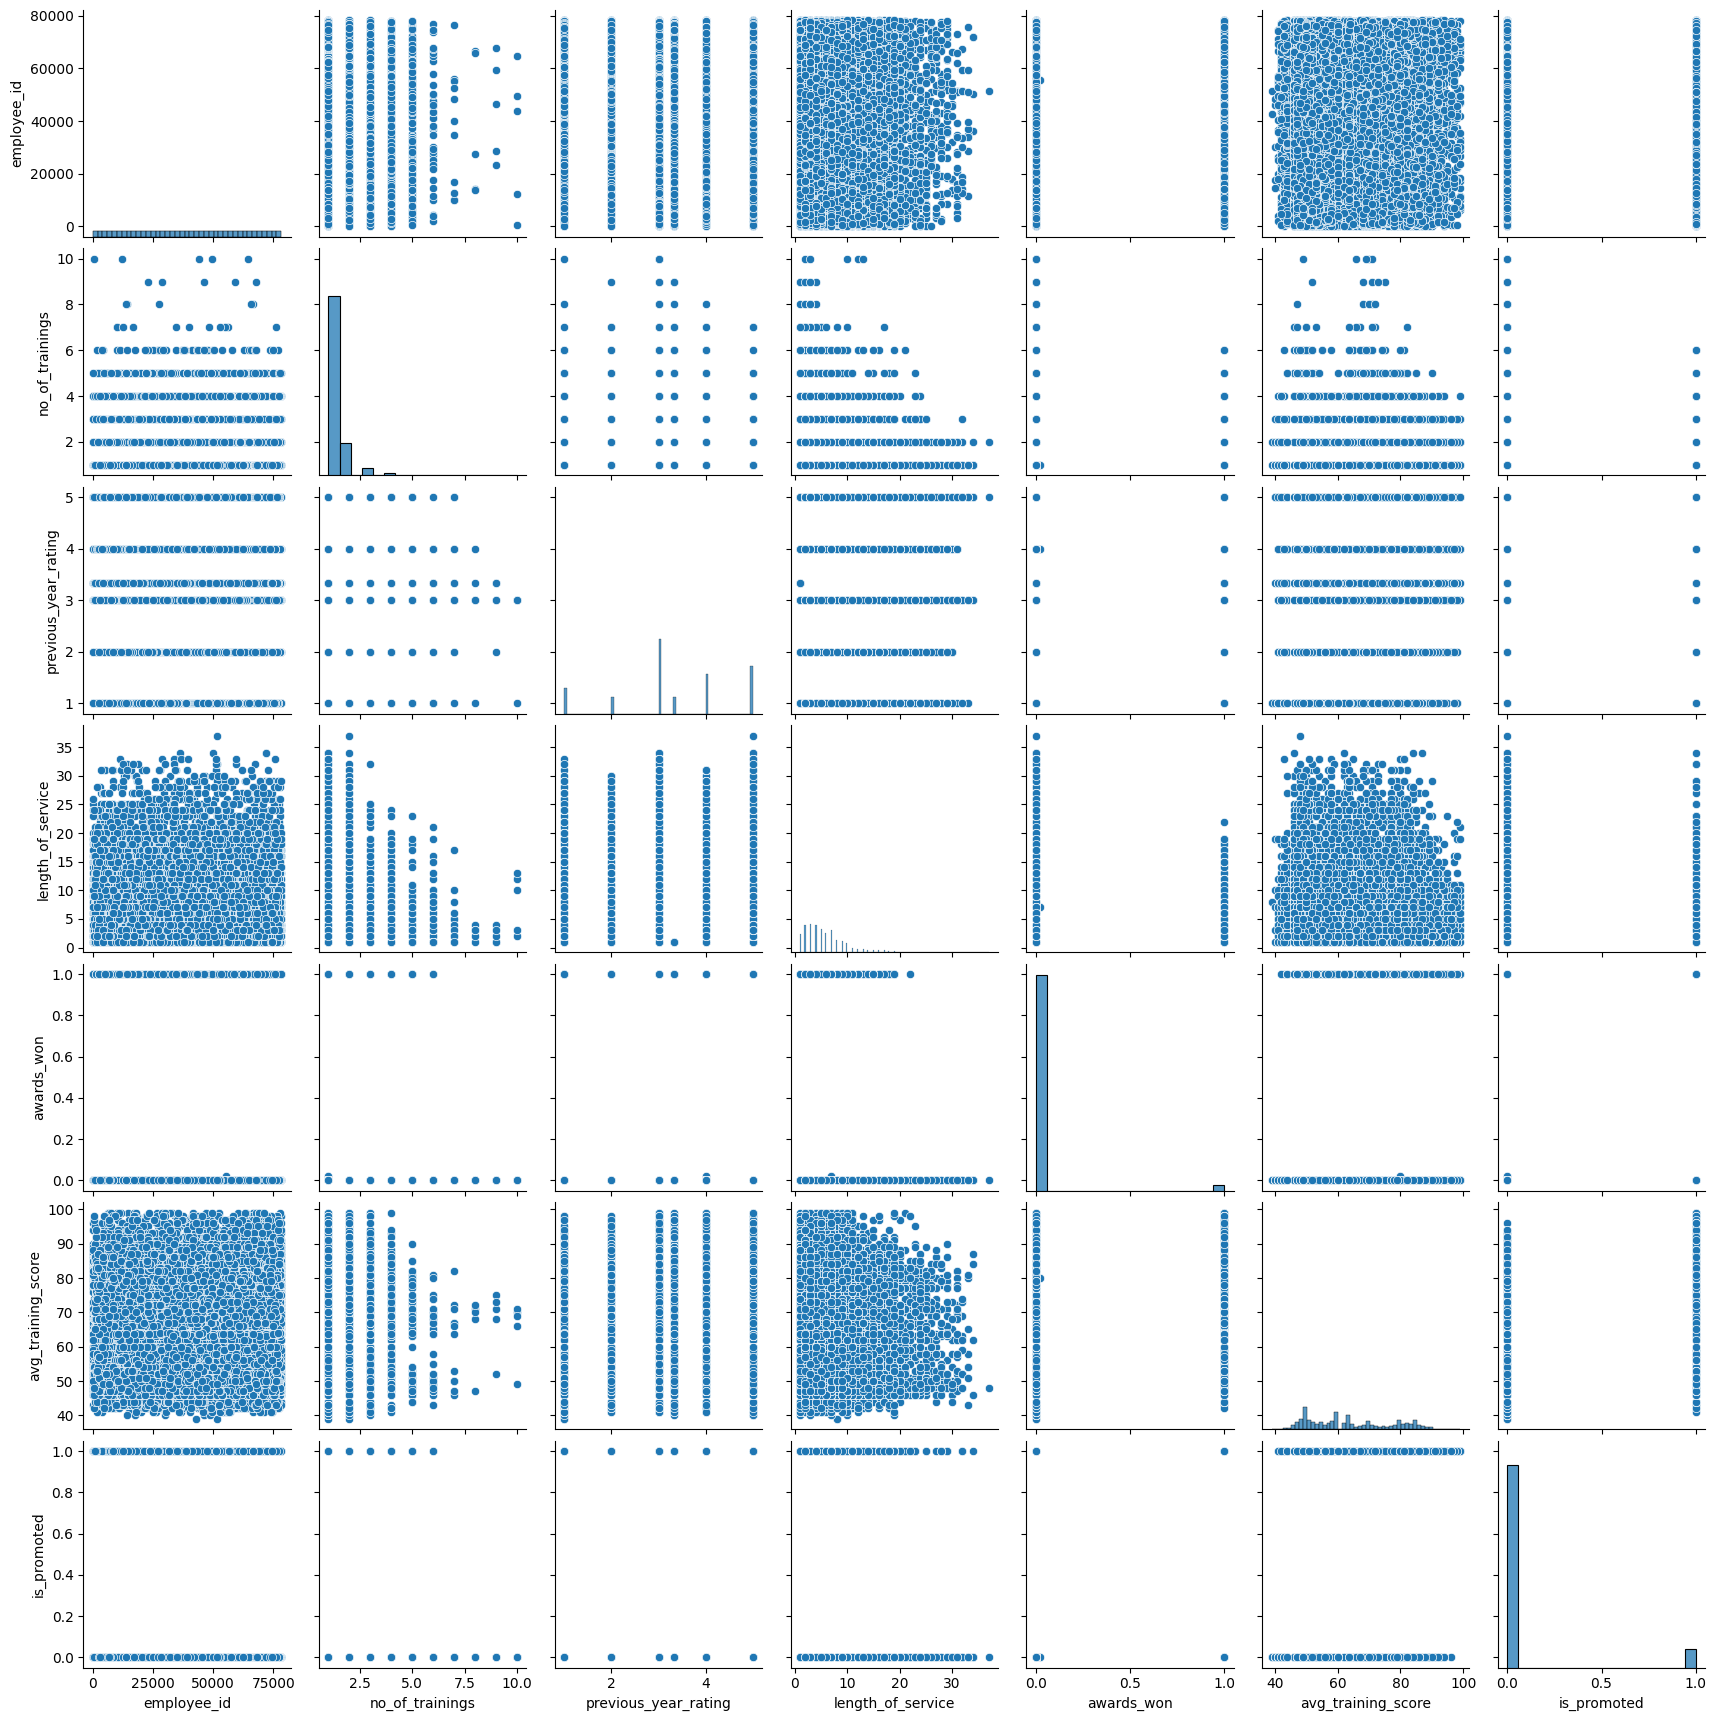

In [12]:
sns.pairplot(data.select_dtypes(include=np.number))
plt.show()

Correlation Matrix

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings            int64
age                     category
previous_year_rating     float64
length_of_service          int64
awards_won               float64
avg_training_score       float64
is_promoted                int64
dtype: object
employee_id: [65438 65141  7513 ... 13918 13614 51526]
no_of_trainings: [ 1  2  3  4  7  5  6  8 10  9]
previous_year_rating: [5.         3.         1.         4.         3.32925578 2.        ]
length_of_service: [ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]
awards_won: [0.         1.         0.02317222]
avg_training_score: [49.         60.         50.         73.         85.         59.
 63.         83.         54.         77.         80.         84.
 51.         46.         75.         57

<ipython-input-13-faf7a100f014>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data.replace("?", np.nan, inplace=True)


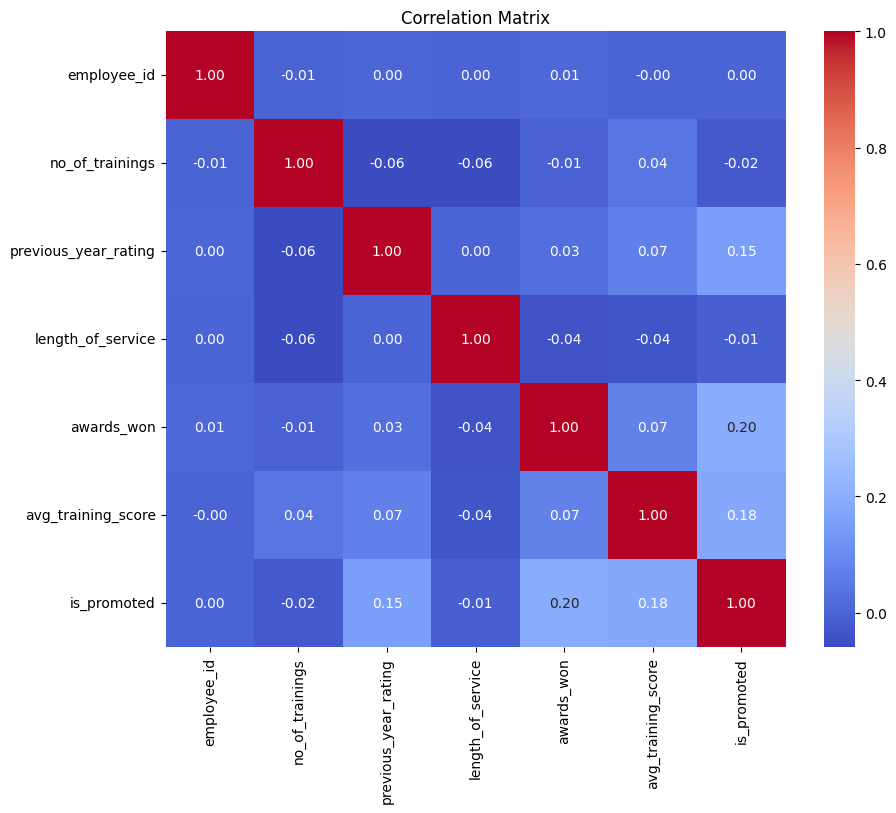

In [13]:
print(data.dtypes)
for col in data.select_dtypes(include='number').columns:
    print(f"{col}: {data[col].unique()}")
data.replace("?", np.nan, inplace=True)
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col])
        except ValueError:
            pass
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
# Correlation matrix
cor_matrix = data.select_dtypes(include='number').corr()
print(cor_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Clustering

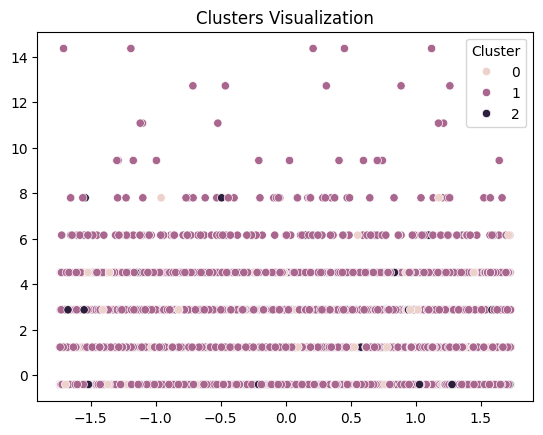

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=np.number))
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['Cluster'])
plt.title("Clusters Visualization")
plt.show()

Dimensionality Reduction

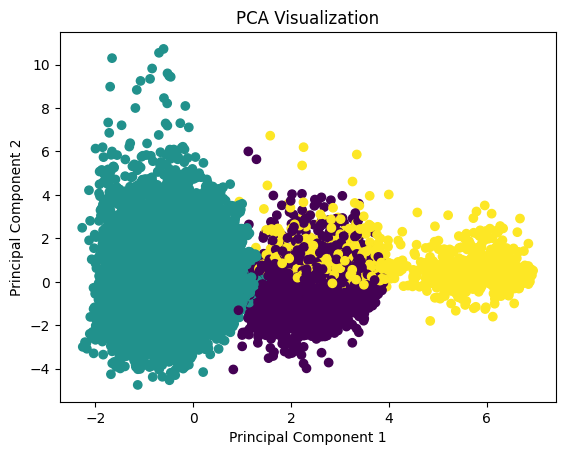

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'])
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Model Development and Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


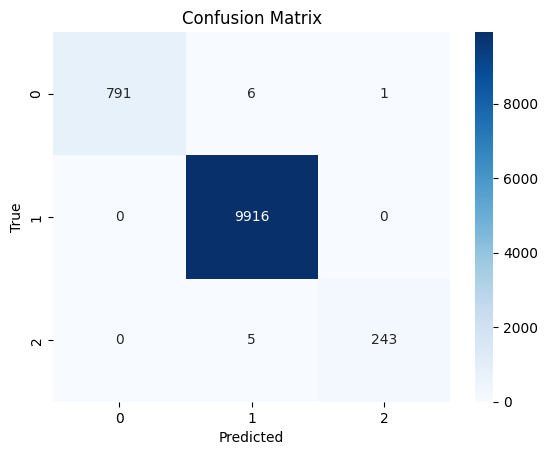

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       798
           1       1.00      1.00      1.00      9916
           2       1.00      0.98      0.99       248

    accuracy                           1.00     10962
   macro avg       1.00      0.99      0.99     10962
weighted avg       1.00      1.00      1.00     10962

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
if data['Cluster'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['Cluster'] = le.fit_transform(data['Cluster'])
X = data.select_dtypes(include=np.number).drop('Cluster', axis=1)
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
if len(data['Cluster'].unique()) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()